In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kondapuramshivani/mall-customerscsv")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\engsm\.cache\kagglehub\datasets\kondapuramshivani\mall-customerscsv\versions\1


In [31]:
import pandas as pd
data = pd.read_csv(path + "/Mall_Customers.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [33]:
data = data.drop(columns=["CustomerID"])
# Convert categorical data to numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in data.select_dtypes(include=["object"]).columns:
    data[column] = le.fit_transform(data[column])

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [35]:
data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

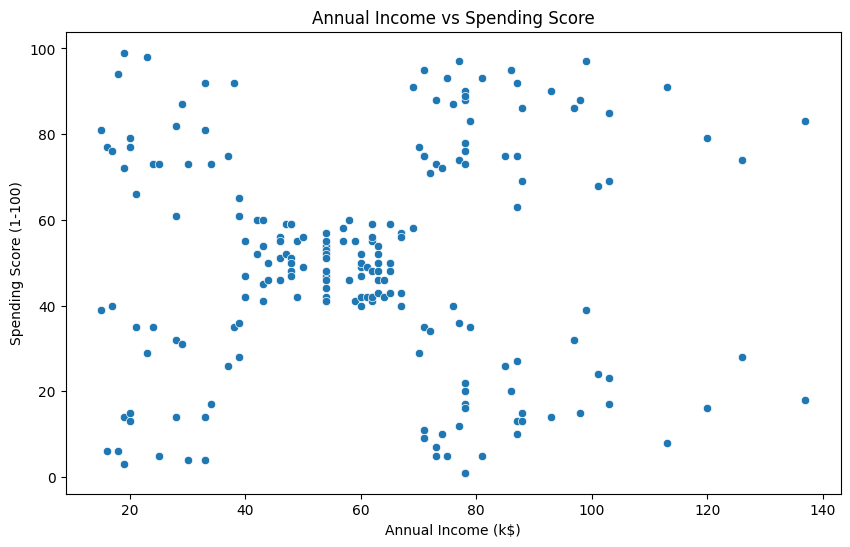

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

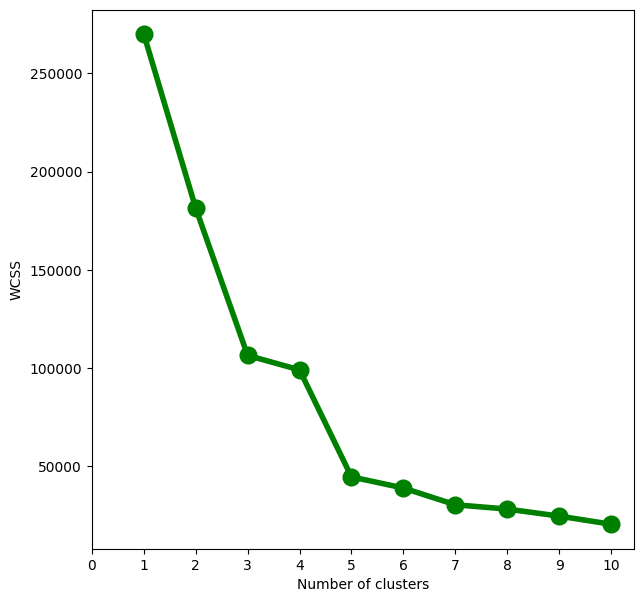

In [9]:
# find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
import numpy as np

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(data)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [28]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 100, n_init = 5, random_state = 42)
y_clusters = model.fit_predict(data)

C:\Users\engsm\AppData\Local\Temp\ipykernel_25892\81540577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = y_clusters


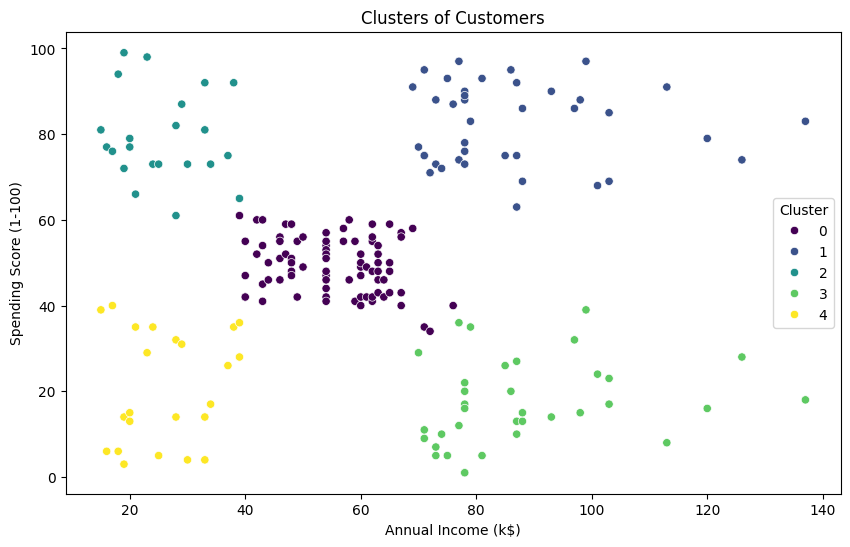

In [29]:
data['cluster'] = y_clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='viridis')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()

In [30]:
# Evaluate the clustering performance using silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data, y_clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.56


# Using Pycaret to run multiple experiments

In [ ]:
!pip install pycaret

In [3]:
# Apply clustering using PyCaret

from pycaret.clustering import *
import pandas as pd
# Load the dataset
dataset = pd.read_csv(path + "/Mall_Customers.csv")
dataset.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in dataset.select_dtypes(include=["object"]).columns:
    dataset[column] = le.fit_transform(dataset[column])
dataset = dataset.drop(columns=["CustomerID"])



In [5]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [10]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(dataset, session_id = 123, log_experiment=True, experiment_name = 'mall_customers')
# s = setup(dataset, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 4)"
2,Transformed data shape,"(200, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


AttributeError: 'ThreadLocalVariable' object has no attribute 'copy'

In [7]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

# init setup on exp
exp.setup(dataset, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 4)"
2,Transformed data shape,"(200, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [8]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [9]:
# train kmeans model
kmeans = create_model('kmeans', num_clusters=5, random_state=123)

# train dbscan model


kmeans_cluster = assign_model(kmeans)
kmeans_cluster

# plot kmeans model
plot_model(kmeans, plot = 'cluster')
plot_model(kmeans, plot = 'elbow')
plot_model(kmeans, plot = 'silhouette')



RuntimeError: This function/method requires the users to run setup() first.
More info: https://pycaret.gitbook.io/docs/get-started/quickstart

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4102,124.2458,0.8333,0,0,0


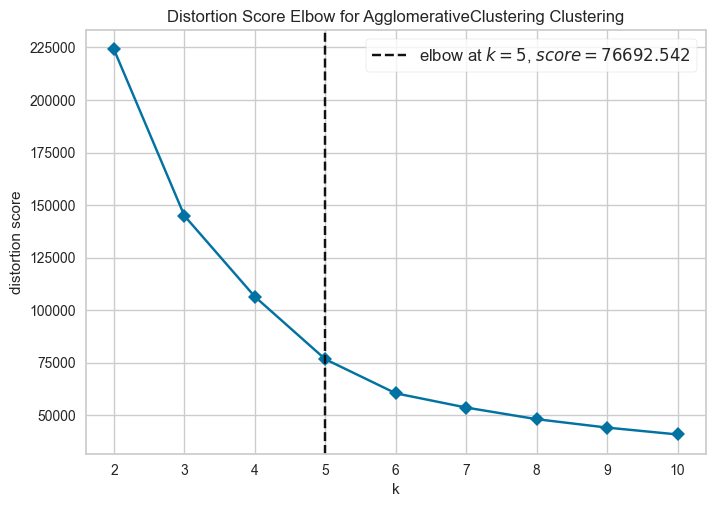

In [22]:
# train hclust model
dbscan = create_model('hclust')
dbscan_cluster = assign_model(dbscan)
dbscan_cluster.head()

plot_model(dbscan, plot = 'cluster')
plot_model(dbscan, plot = 'elbow')

# Show casing pycaret with regression

In [11]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [12]:
# import pycaret regression and init setup
from pycaret.regression import *
from pycaret.regression import RegressionExperiment
s = setup(dataset, target = 'Spending Score (1-100)', session_id = 123)
# import RegressionExperiment and init the class
exp = RegressionExperiment()
# init setup on exp
exp.setup(dataset, target = 'Spending Score (1-100)', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Spending Score (1-100)
2,Target type,Regression
3,Original data shape,"(200, 4)"
4,Transformed data shape,"(200, 4)"
5,Transformed train set shape,"(140, 4)"
6,Transformed test set shape,"(60, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,123
1,Target,Spending Score (1-100)
2,Target type,Regression
3,Original data shape,"(200, 4)"
4,Transformed data shape,"(200, 4)"
5,Transformed train set shape,"(140, 4)"
6,Transformed test set shape,"(60, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [13]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,14.9929,457.0843,20.6166,0.2125,0.6163,1.2130,0.0150
lightgbm,Light Gradient Boosting Machine,16.0315,467.5834,21.1458,0.1618,0.6355,1.2458,0.0490
ada,AdaBoost Regressor,17.3116,510.7009,22.1631,0.0894,0.6581,1.2805,0.0220
rf,Random Forest Regressor,15.9113,535.7638,22.4283,0.0088,0.6440,1.2517,0.0500
omp,Orthogonal Matching Pursuit,20.0323,583.9077,23.7834,-0.0352,0.7103,1.3967,0.0110
br,Bayesian Ridge,20.1292,602.9713,24.1143,-0.0599,0.7150,1.4195,0.0090
lasso,Lasso Regression,20.2804,601.5674,24.0962,-0.0628,0.7149,1.4158,0.0100
llar,Lasso Least Angle Regression,20.2804,601.5674,24.0962,-0.0628,0.7149,1.4158,0.0110
en,Elastic Net,20.2909,602.1577,24.1057,-0.0636,0.7151,1.4176,0.0080
ridge,Ridge Regression,20.4561,611.2283,24.2710,-0.0766,0.7181,1.4350,0.0090
